<a href="https://colab.research.google.com/github/gustavo-ifusp/prefeitura_smit_sp360/blob/main/estatistica_descritiva_adequacao_de_ofertas_onibus_sptrans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from datetime import datetime, date, timedelta
from collections import namedtuple

#**Manipulando os dados**

In [ ]:
dados = pd.DataFrame()
dados = pd.read_csv('fato_total_passageiros_transportados_sptrans.csv')
dados.tail(10)

,data_contabilizacao,dia_da_semana,total_passageiros_transportados,passageiros_pagtes_em_dinheiro,passageiros_comum_e_vt,passageiros_pgts_bu_comum_m,passageiros_pagtes_estudante,passageiros_pgts_bu_est_mensal,passageiros_pgts_bu_vt_mensal,passageiros_pagantes,passageiros_int_onibus_onibus,passageiros_com_gratuidade,passageiros_com_gratuidade_est
910,2021-08-01,Domingo,1392340,117429,657613,35953,3244,22,9,814270,377051,189086,11933
911,2021-08-02,Segunda-feira,4494561,311657,2241423,100502,19298,41,19,2672940,1262525,499463,59633
912,2021-08-03,Terça-feira,4838057,299532,2421517,111446,24922,57,23,2857497,1371212,525091,84257
913,2021-08-04,Quarta-feira,4985943,301444,2486363,115398,27665,45,17,2930932,1399190,561333,94488
914,2021-08-05,Quinta-feira,5086312,307427,2534607,118010,28746,74,28,2988892,1435754,563052,98614
915,2021-08-06,Sexta-feira,5537159,366550,2740300,127022,30802,51,27,3264752,1541411,638870,92126
916,2021-08-07,Sábado,3419556,284744,1664757,87888,13905,67,11,2051372,907874,399412,60898
917,2021-08-08,Domingo,1683558,160330,776474,42842,5766,39,12,985463,448757,222127,27211
918,2021-08-09,Segunda-feira,4916277,337314,2409227,113554,30406,58,15,2890574,1364137,558303,103263
919,2021-08-10,Terça-feira,4900030,307472,2396709,114760,32545,46,25,2851557,1393409,548507,106557


In [ ]:
dados['data_contabilizacao'] = pd.to_datetime(dados['data_contabilizacao'])
dados['dia_da_semana'] = dados['dia_da_semana'].astype("category")
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   data_contabilizacao              920 non-null    datetime64[ns]
 1   dia_da_semana                    920 non-null    category      
 2   total_passageiros_transportados  920 non-null    int64         
 3   passageiros_pagtes_em_dinheiro   920 non-null    int64         
 4   passageiros_comum_e_vt           920 non-null    int64         
 5   passageiros_pgts_bu_comum_m      920 non-null    int64         
 6   passageiros_pagtes_estudante     920 non-null    int64         
 7   passageiros_pgts_bu_est_mensal   920 non-null    int64         
 8   passageiros_pgts_bu_vt_mensal    920 non-null    int64         
 9   passageiros_pagantes             920 non-null    int64         
 10  passageiros_int_onibus_onibus    920 non-null    int64        

#**Media por dia da semana de todo retroativo acumulado até 04-08-2021**

In [ ]:
media = dados.groupby(['dia_da_semana'])['total_passageiros_transportados'].mean()
display(media)

dia_da_semana
Domingo          2.074338e+06
Quarta-feira     6.117883e+06
Quinta-feira     6.158560e+06
Segunda-feira    5.879261e+06
Sexta-feira      6.040613e+06
Sábado           3.795174e+06
Terça-feira      6.012851e+06
Name: total_passageiros_transportados, dtype: float64

#**Mediana por dia da semana**

In [ ]:
mediana = dados.groupby(['dia_da_semana'])['total_passageiros_transportados'].median()
print(mediana)

dia_da_semana
Domingo          1786178.5
Quarta-feira     5289578.0
Quinta-feira     5218175.5
Segunda-feira    4932345.0
Sexta-feira      5204292.0
Sábado           3444932.0
Terça-feira      5173633.5
Name: total_passageiros_transportados, dtype: float64


#**Moda por dia da semana**

In [ ]:
#moda = dados.groupby(['dia_da_semana'])['total_passageiros_transportados'].mode() # não esta dando certo porque não existe moda, os valores não se repetem nos últimos 2,5 anos!
#display(moda)

#**Visualização dos Passageiros Transportados:**



*   Eixo x: coluna 'data'  
*   Eixo y: coluna 'total_passageiros_transportados'
*   Hue:  coluna 'dia_da_semana'
*   Base: 'dados'














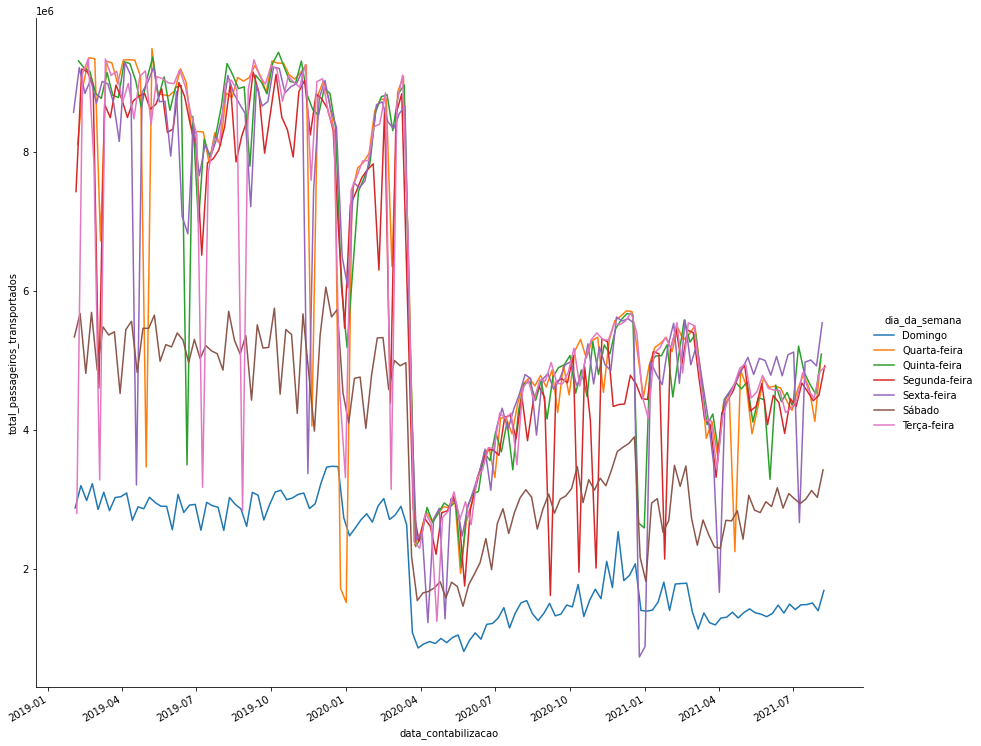

In [ ]:
g = sns.relplot(x="data_contabilizacao", y="total_passageiros_transportados", kind="line", hue="dia_da_semana" , data = dados, height=12)
g.fig.autofmt_xdate()

In [ ]:
dados.to_csv(r'fato_total_passageiros_transportados_sptrans_export.csv', index = False)

#**Biblioteca plotly**

Gráficos interativos - estudando a biblioteca

In [ ]:
import plotly.express as px

fig = px.line(dados, x="data_contabilizacao", y="total_passageiros_transportados", title='Teste 1', color='dia_da_semana')
fig.show()